In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils import ICV_img_windows, ICV_img_lbp, ICV_img_lbp_hist

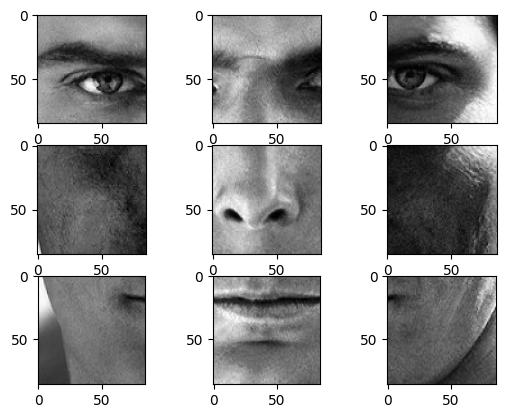

<Figure size 1200x1200 with 0 Axes>

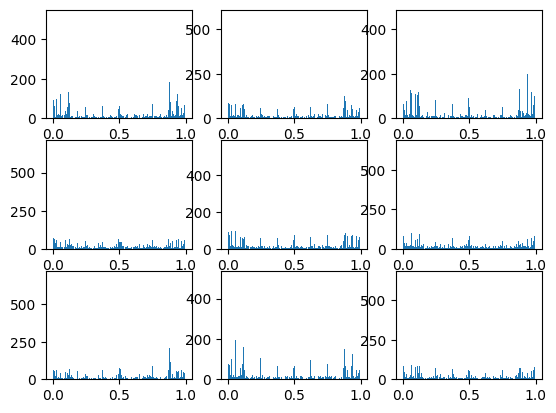

In [2]:
# Convert images to Gray Scale with Open CV
image = cv2.imread('../../data/DatasetA/face-1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Split the image into equal windows: this example will use 9
images = ICV_img_windows(image)

# Calculate and plot the Local Binary Patterns for each image
# Use the returned LBPs as descriptors for classification
lbp_descriptors = ICV_img_lbp_hist(images)
# Plot histogram using square-root bins - this is equal to the window length (128x128)
plt.figure(figsize=(12, 12))
fig, axs = plt.subplots(3, 3)
axs[0, 0].hist(lbp_descriptors[0], bins=256)
axs[0, 1].hist(lbp_descriptors[1], bins=256)
axs[0, 2].hist(lbp_descriptors[2], bins=256)
axs[1, 0].hist(lbp_descriptors[3], bins=256)
axs[1, 1].hist(lbp_descriptors[4], bins=256)
axs[1, 2].hist(lbp_descriptors[5], bins=256)
axs[2, 0].hist(lbp_descriptors[6], bins=256)
axs[2, 1].hist(lbp_descriptors[7], bins=256)
axs[2, 2].hist(lbp_descriptors[8], bins=256)

# Save the histograms
plt.savefig(fname=f'../../output/cw4/face1_lbp_hists.png')


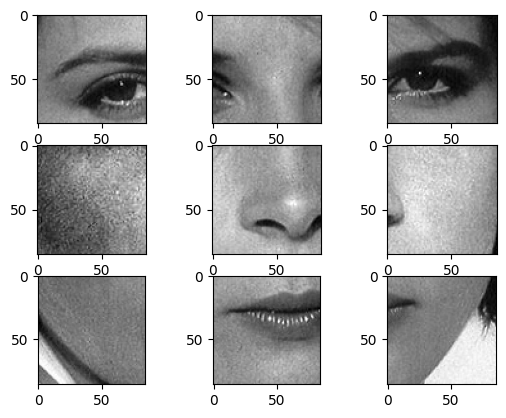

In [3]:
# Create descriptors from the face-1 image to classify other images as a face or car

# Eyes - the LBP descriptors for the eyes are located at indexes 0 and 2.
# Add the descriptors to group the eyes as one descriptor
desc_eyes = np.array((lbp_descriptors[0] + lbp_descriptors[2]))


# Nose - the LBP descriptor for the nose is located at index 4
desc_nose = np.array(lbp_descriptors[4])

# Mouth - the LBP descriptor for the mouth is located at index 7
desc_mouth = np.array(lbp_descriptors[7])

# Test this on another face image. Gather the LBPs for the image
image = cv2.imread('../../data/DatasetA/face-3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

images = ICV_img_windows(image)
img2_lbp_descriptors = ICV_img_lbp_hist(images)

# Calculate the difference between the lbp values and plot them
result = desc_eyes - (img2_lbp_descriptors[0] + img2_lbp_descriptors[1])
plt.hist(result, bins=256)
